In [15]:
# Setup
import pandas as pd 
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('dark')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
print('Setup complete')

Setup complete


In [16]:
import os

path = os.getcwd()

print("Currently at", path)


Currently at C:\Users\Sarthak\titanic


In [17]:
train_data = pd.read_csv(path+"/data/train.csv")       #Importing training dataset
train_data.set_index("PassengerId", inplace=True)        #Setting Index 
train_data.head()                                     

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
test_data = pd.read_csv(path+"/data/test.csv")         #Importing testing dataset
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train_data.info()                                      # Gathering basic info of the training dataset

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [20]:
test_data.info()                                       # Gathering basic info of the testing dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [21]:
train_data['Survived'].value_counts(normalize=True)     

0    0.616162
1    0.383838
Name: Survived, dtype: float64

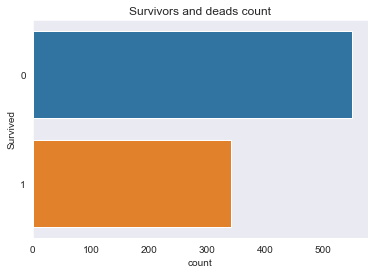

In [22]:
g = sns.countplot(y=train_data['Survived']).set_title('Survivors and deads count')

In [23]:
# From the above graph we infer that only about 38.4% of the people survived


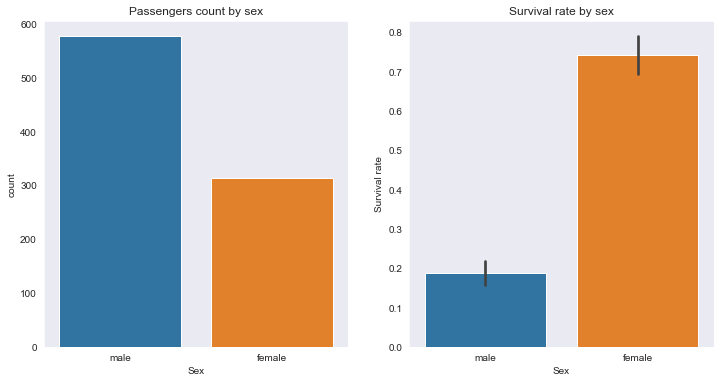

In [24]:
# Feature Analysis and Selection
# Plotting Passenger count and survival rate by sex
fig, axarr = plt.subplots(1, 2, figsize=(12,6))
a = sns.countplot(train_data['Sex'], ax=axarr[0]).set_title('Passengers count by sex')
axarr[1].set_title('Survival rate by sex')
b = sns.barplot(x='Sex', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [25]:
# From the above graph we see that around 65% of the passengers were male while the remaining 35% were female.
# the survival rate for women was four times the survival rate for men

# Analysing Survival by Passenger Class
train_data.groupby('Pclass').Survived.mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

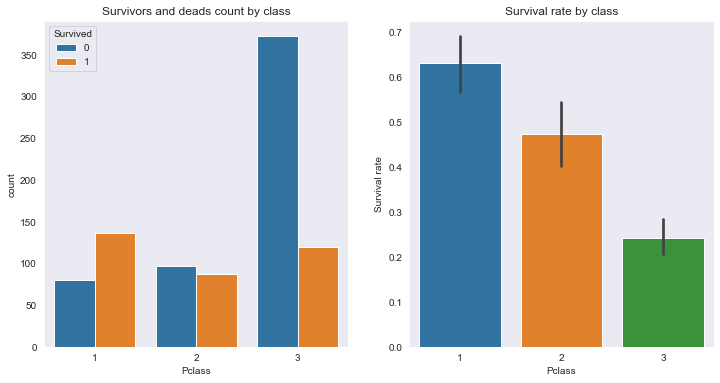

In [26]:
# Plotting 'Survived' vs 'PClass' graph
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(x='Pclass', hue='Survived', data=train_data, 
                  ax=axarr[0]).set_title('Survivors and deads count by class')
axarr[1].set_title('Survival rate by class')
b = sns.barplot(x='Pclass', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [27]:
# From the above graph we can see that  the number of passengers in the third class was 
# higher than the number of passengers in first and second class combined.
# more than 60% of first class passengers and around half of second class passengers were rescued,
# whereas 75% of third class passengers were not able to survive the disaster.

In [28]:
#Analysing survival rate by 'Sex' and 'Pclass'
train_data.groupby(['Pclass', 'Sex']).Survived.mean()

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [29]:
# We see that first class and second class women who were rescued were respectively 97% and 92%, while the percentage drops
# to 50% for third class women. Despite that, this is still more than the 37% survival rate for first class men.

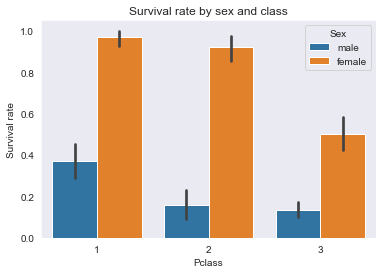

In [30]:
#Plotting graph 
plt.title('Survival rate by sex and class')
g = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=train_data).set_ylabel('Survival rate')

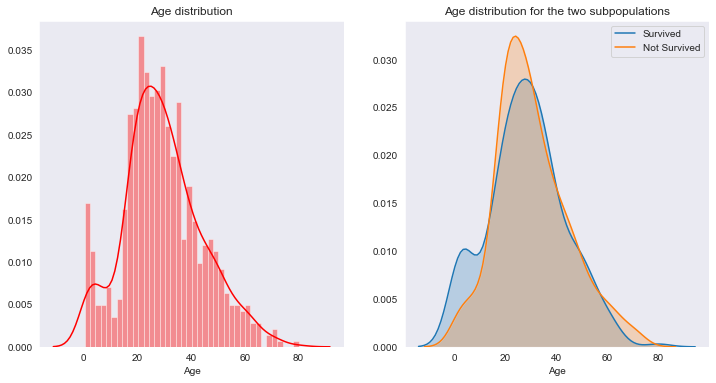

In [31]:
# Age distribution Plot
fig, axarr = plt.subplots(1,2,figsize=(12,6))
axarr[0].set_title('Age distribution')
f = sns.distplot(train_data['Age'], color='red', bins=40, ax=axarr[0])
axarr[1].set_title('Age distribution for the two subpopulations')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 1], 
                shade= True, ax=axarr[1], label='Survived').set_xlabel('Age')
g = sns.kdeplot(train_data['Age'].loc[train_data['Survived'] == 0], 
                shade=True, ax=axarr[1], label='Not Survived')

In [32]:
# Despite this column contains a lot of missing values, we see that in the training data the average age was just under
# 30 years.

c:\program files\python3.8\lib\site-packages\seaborn\categorical.py:1326: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
c:\program files\python3.8\lib\site-packages\seaborn\categorical.py:1330: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


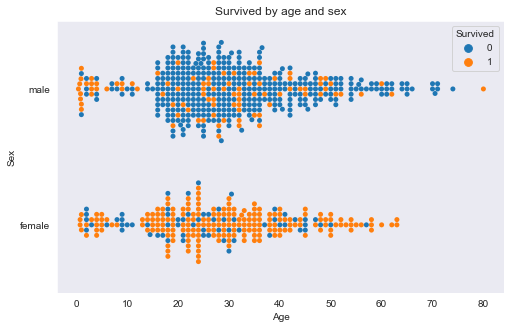

In [33]:
# Analysing Survival by 'Age' and 'Sex'
plt.figure(figsize=(8,5))
g = sns.swarmplot(y='Sex', x='Age', hue='Survived', data=train_data).set_title('Survived by age and sex')

In [34]:
# We see that a good number of male survivors had less than 12 years, while the female group has no particular properties.

In [35]:
train_data.Fare.describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [36]:
# From the description we see that the fare distribution is positively skewed, with 75% of data under 31 and a maximum of 512.

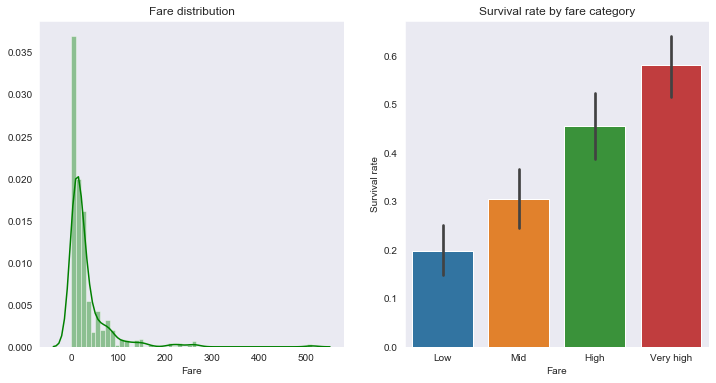

In [37]:
# Plotting 'Fare' vs Survival Rate Graph
fig, axarr = plt.subplots(1,2,figsize=(12,6))
f = sns.distplot(train_data.Fare, color='g', ax=axarr[0]).set_title('Fare distribution')
# We divide the fare into 4 categories or quartiles
fare_ranges = pd.qcut(train_data.Fare, 4, labels = ['Low', 'Mid', 'High', 'Very high'])
axarr[1].set_title('Survival rate by fare category')
g = sns.barplot(x=fare_ranges, y=train_data.Survived, ax=axarr[1]).set_ylabel('Survival rate')

In [38]:
# At a first look we see that higher the fare, higher was the possibility of surviving.

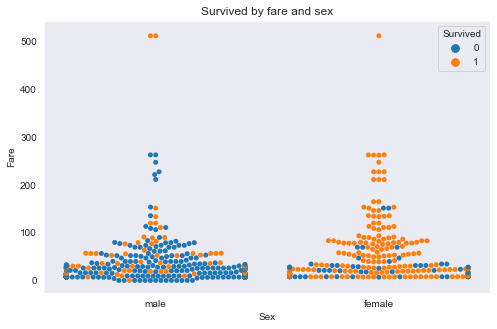

In [40]:
# Swarm plot of Survival by 'Fare' and 'Sex'
plt.figure(figsize=(8,5))
a = sns.swarmplot(x='Sex', y='Fare', hue='Survived',data=train_data).set_title('Survived by fare and sex')

In [41]:
# Looking at the plot swarm plot above , we see that all males with fare between 200 and 300 died. That is not what we would
# expect. It shows that the data is underfit.

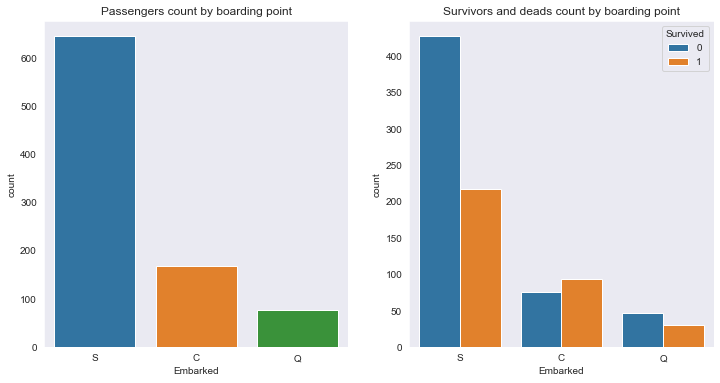

In [42]:
# Analysing Survival by Boarding Point('Embarked')
fig, axarr = plt.subplots(1,2,figsize=(12,6))
sns.countplot(train_data['Embarked'], ax=axarr[0]).set_title('Passengers count by boarding point')
p = sns.countplot(x = 'Embarked', hue = 'Survived', data = train_data, 
                  ax=axarr[1]).set_title('Survivors and deads count by boarding point')

In [43]:
# We see that more than 70% of the people boarded from Southampton, slightly under 20% from Cherbourg and the rest from 
# Queenstown.
# Counting survivors by boarding point, we see that more people who embarked from Cherbourg survived than those who died.

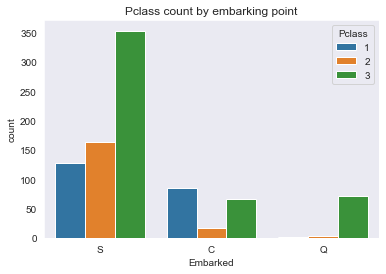

In [44]:
#Plot of 'Pclass' count vs embarking point
g = sns.countplot(data=train_data, x='Embarked', hue='Pclass').set_title('Pclass count by embarking point')

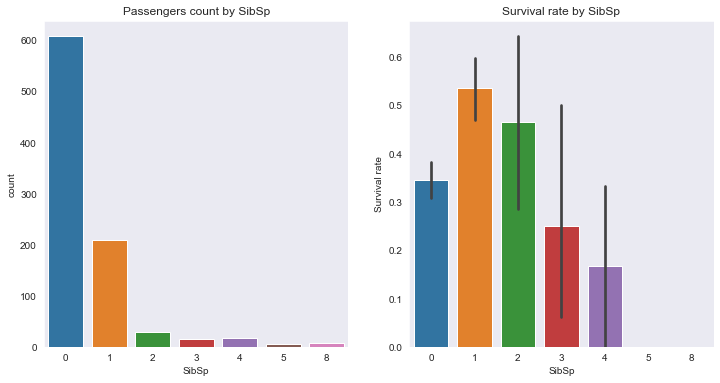

In [45]:
# Analysing passenger count and survival rate by 'Sibsp'(no. of siblings and/or spouses)
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['SibSp'], ax=axarr[0]).set_title('Passengers count by SibSp')
axarr[1].set_title('Survival rate by SibSp')
b = sns.barplot(x='SibSp', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [46]:
# We see that more than 90% of people traveled alone or with one sibling or spouse.
# we see that the chances of surviving are lower for those who traveled alone or with more than 2 siblings.
# Furthermore, we notice that no one from a big family with 5 or 8 siblings was able to survive.

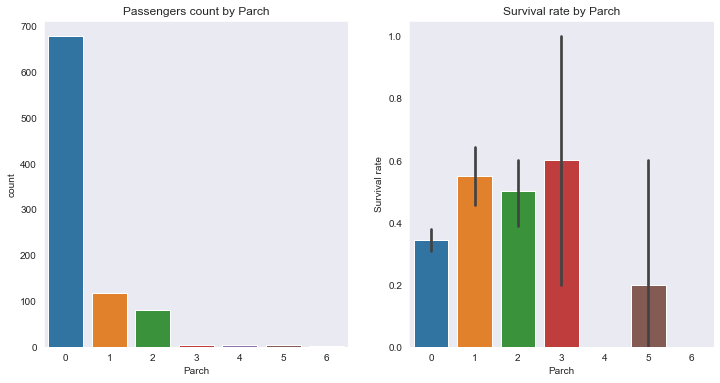

In [47]:
# Analysing passenger count and survival rate by 'Parch'(number of parents or children)
fig, axarr = plt.subplots(1,2,figsize=(12,6))
a = sns.countplot(train_data['Parch'], ax=axarr[0]).set_title('Passengers count by Parch')
axarr[1].set_title('Survival rate by Parch')
b = sns.barplot(x='Parch', y='Survived', data=train_data, ax=axarr[1]).set_ylabel('Survival rate')

In [48]:
# From the above graph above we see that we see again that small families had more chance to survive than bigger ones and 
# passengers who traveled alone.

In [49]:
# Combining 'Sibsp' and 'Parch' into single variable family size
train_data['Fam_size'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['Fam_size'] = test_data['SibSp'] + test_data['Parch'] + 1

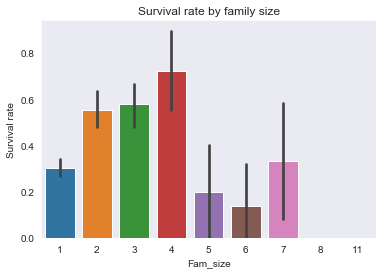

In [50]:
# Plotting Survival rate by family size
plt.title('Survival rate by family size')
g = sns.barplot(x=train_data.Fam_size, y=train_data.Survived).set_ylabel('Survival rate')

In [51]:
# From the graph above, it is clear that people who were alone had a lower chance of surviving than families up to 4 components,
# while the survival rate drops for bigger familes and ultimately becomes zero for very large ones.

In [55]:
# Defining family types
train_data['Fam_type'] = pd.cut(train_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])
test_data['Fam_type'] = pd.cut(test_data.Fam_size, [0,1,4,7,11], labels=['Solo', 'Small', 'Big', 'Very big'])

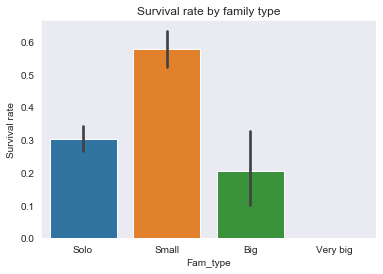

In [56]:
# Plotting survival rate by family type
plt.title('Survival rate by family type')
g = sns.barplot(x=train_data.Fam_type, y=train_data.Survived).set_ylabel('Survival rate')

In [57]:
# We see that small families have the highest chance of survival.

In [58]:
# Feature selection
y = train_data['Survived']
features = ['Pclass', 'Sex', 'Fare','Embarked', 'Fam_type']
X = train_data[features]
X.head()

,Pclass,Sex,Fare,Embarked,Fam_type
PassengerId,,,,,
1,3,male,7.2500,S,Small
2,1,female,71.2833,C,Small
3,3,female,7.9250,S,Solo
4,1,female,53.1000,S,Small
5,3,male,8.0500,S,Solo


In [59]:
numerical_cols = ['Fare']
categorical_cols = ['Pclass', 'Sex', 'Embarked', 'Fam_type']


# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='median')        # Fills missing values with the median value


# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),       # Fills missing values with most frequent value
    ('onehot', OneHotEncoder())                                 # Encodes categorical features as numeric array
])


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])



# Bundle preprocessing and modeling code using 'Random Forest Algorithm'
titanic_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', RandomForestClassifier(random_state=0, 
                                                               n_estimators=500, max_depth=5))
                             ])



# Preprocessing of training data, fit model 
titanic_pipeline.fit(X,y)



print('Cross validation score: {:.3f}'.format(cross_val_score(titanic_pipeline, X, y, cv=10).mean()))

Cross validation score: 0.807


In [60]:
# Selecting test data

X_test = test_data[features]
X_test.head()


,Pclass,Sex,Fare,Embarked,Fam_type
0,3,male,7.8292,Q,Solo
1,3,female,7.0000,S,Small
2,2,male,9.6875,Q,Solo
3,3,male,8.6625,S,Solo
4,3,female,12.2875,S,Small


In [61]:
# Predicting on test data
predictions = titanic_pipeline.predict(X_test)

In [62]:
# Saving the prediction result in a csv file
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('my_submission.csv', index=False)
print('Your submission was successfully saved!')

Your submission was successfully saved!
